**Tech Preamble**

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

In [3]:
region = "Kuro_new_2"

**Load Data**

In [4]:
data_CESM = np.load(f"/home/hmelzer/work/esn/CESM/Data/ssh_{region}_5d.npy")
lon_CESM = np.load(f"/home/hmelzer/work/esn/CESM/Data/lon_{region}.npy")
lat_CESM = np.load(f"/home/hmelzer/work/esn/CESM/Data/lat_{region}.npy")

**Load ESN**

In [33]:
from CESM_predict import train_and_predict_2d
# from SWE_predict import train_and_predict_2d

**Run ESN on SWE Data**

In [34]:
def test_SWE(savedir):
    data = data_CESM
    lon = lon_CESM
    lat = lat_CESM
    unit = "SSH [m]"

    input_shape = (data_CESM.shape[1], data_CESM.shape[2])
    input_size  = input_shape[0] * input_shape[1]
    
    #Ntotal = 1241 #17 years (25-41) 3d - 2068
    Ntrain = 657 #9 years (25-33) 3d -1095
    Npred = 146 #583 #8 years (34-41) 3d - 972
    Ntrans = 146 #2 years (25-26) 3d - 243

    N = Npred+Ntrain+1

    k = 0.1
    
    specs = [
        {"type": "pixels", "size": (10, 10), "factor": k},
        {"type": "conv", "size": (10, 10), "kernel": "gauss",  "factor": k},
        {"type": "conv", "size": (10, 10), "kernel": "random",  "factor": k},
        {"type": "gradient", "factor": 0.001},
        {"type": "vorticity", "factor": 0.001},
        {"type": "dct", "size": (10, 10), "factor": k},
        {"type": "random_weights", "input_size": input_size, "hidden_size": 10000, "factor": 10}
    ]

    
    parameter_dict = dict(
        specs = specs,
        Npred  = Npred,
        Ntrain = Ntrain,
        Ntrans = Ntrans,
        spectral_radius = 0.94,
        neuron_connections = 100,
        n_PCs  = 350,
        sigma  =  (0,1,1),
        eps    =  1e-2,
        plot_prediction = True,
        dtype='float64',
        lstsq_method ='svd',
        lstsq_thresh = 1e-3,
        ST_method = 'DCT',
        cpus_to_use = 32,
        scale_min = -1,
        scale_max =  1,
        savedir = savedir,
        neuron_dist = 'normal',
        upper_sr_calc_dim=5000,
        save_condition = 'always',
        random_seed = np.random.seed(),
        
    )

    return train_and_predict_2d(data, lon, lat, unit, config=parameter_dict, **parameter_dict)

Image shape is (256, 512)
Data is taking up 0.7GB. Deleting after splitting.


Starting pre-processing...
Finished pre-processing!
Starting Building Dyn. Sys. ...
Input size (1 slice): (256, 512)
Hidden size: 665560
Building Whh took 17.07s
Starting transient Evolution of dyn. sys. ...
Transient evolution of dynamical system (146 steps) took 18.42s
Starting harvest of echo states ...
State harvesting of 511 echo states took 64.47s
Starting PCA dim. reduction ...
PCA Dimension reduction of H took: 23.89s
Starting to create Readout Matrix using lstsq
Least Squares optimization took 0.24s
Training error: 4.6209520606353983e-05
Starting Prediction ...
Predicting for 146 time steps took 29.72s
Starting post-processing ...
MSE-IMED: MSE in standardizing-transform-space: 9.14e-03
MSE after rescaling,iST of preds and targets: 4.51e+01
MSE after rescaling,iST of preds wrt. untouched targets: 4.51e+01
Total time: 509.5s
mse is 45.099597886469574
Always saving model
Saving at Kuro_new_2/esn006
y0
h0
Whh
bh
Who
predictions
targets
pred_error
time_int_spat_error
Saving plots/

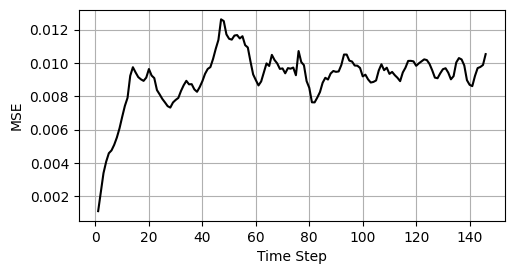

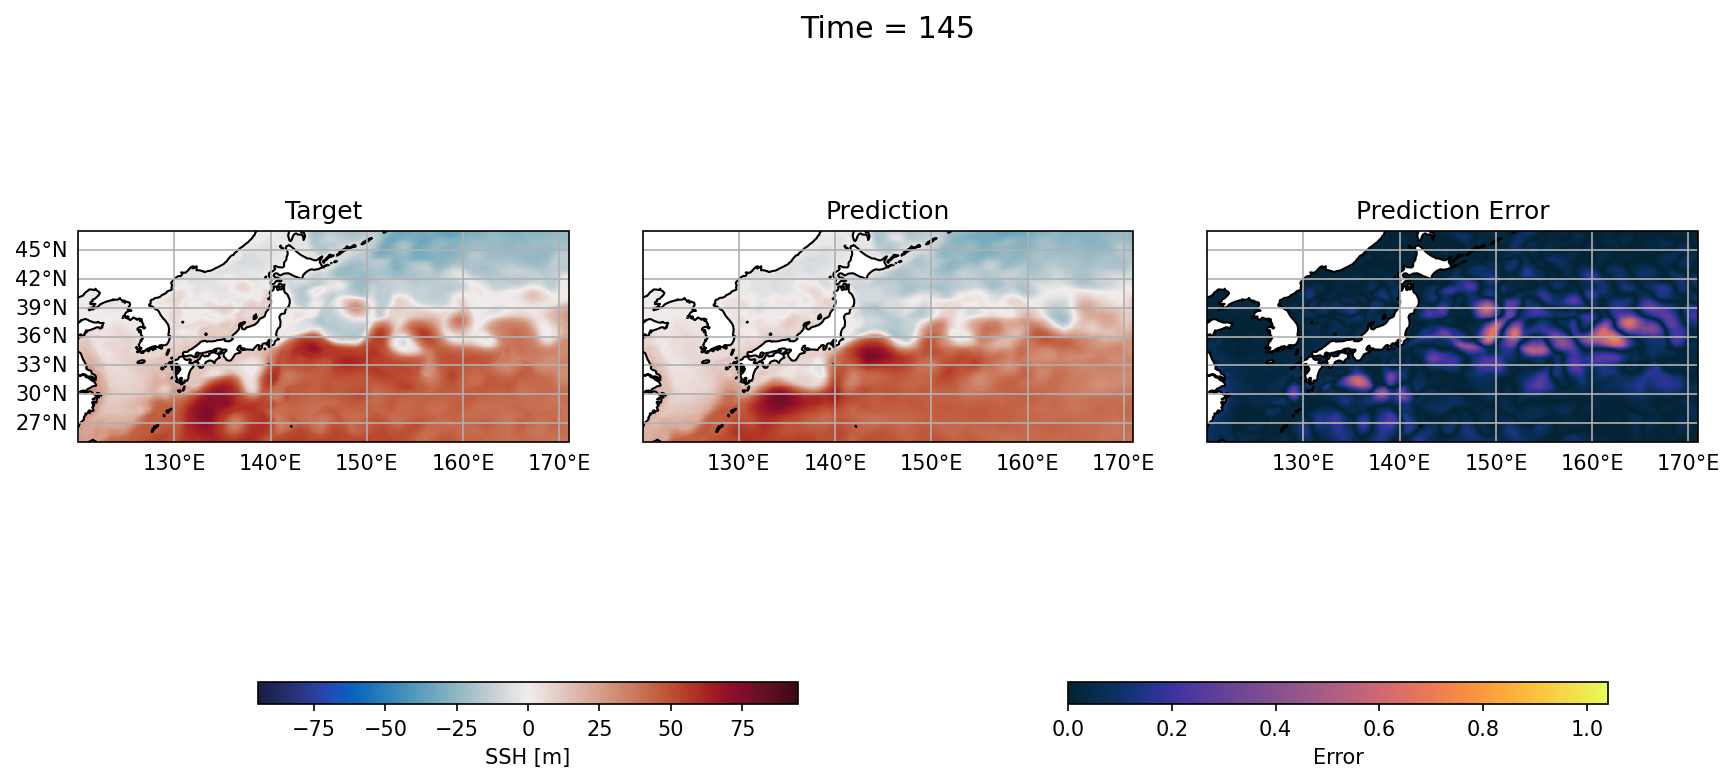

In [35]:
mse = test_SWE(region)

